In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set working directory
import os
current_dir = os.getcwd()
os.chdir(current_dir.replace('\code', '\data'))

In [57]:
# Load data
data = pd.read_csv('BBM_IV_Round_1_Part_00_09272023.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016064 entries, 0 to 1016063
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   draft_id                         1016064 non-null  object 
 1   user_id                          1016064 non-null  object 
 2   username                         1016064 non-null  object 
 3   draft_time                       1016064 non-null  object 
 4   clock                            1016064 non-null  int64  
 5   draft_entry_id                   1016064 non-null  object 
 6   tournament_entry_id              1016064 non-null  object 
 7   tournament_round_draft_entry_id  1016064 non-null  object 
 8   tournament_round_number          1016064 non-null  int64  
 9   player_name                      1016064 non-null  object 
 10  position_name                    1016064 non-null  object 
 11  bye_week                         1016064 non-null 

In [59]:
# Sample 5000 unique 'draft_id's 
draft_ids = data['draft_id'].unique()
sample_draft_ids = np.random.choice(draft_ids, 1000, replace=False)

# Filter data to only include the sample draft_ids
data_sample = data[data['draft_id'].isin(sample_draft_ids)]

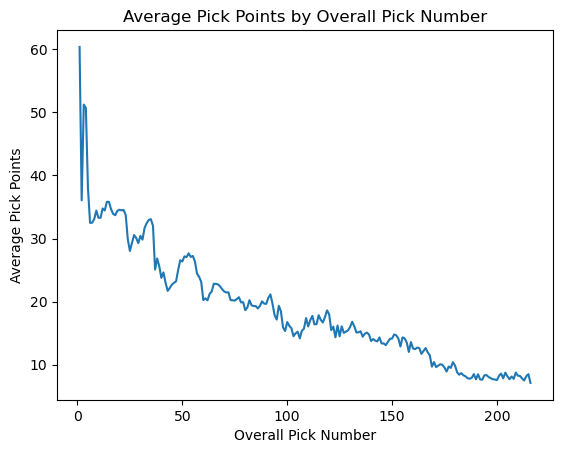

In [60]:
# Group by 'overall_pick_number' and average 'pick_points'
data_grouped = data_sample.groupby('overall_pick_number')['pick_points'].mean().reset_index()

# Plot
plt.plot(data_grouped['overall_pick_number'], data_grouped['pick_points'])
plt.xlabel('Overall Pick Number')
plt.ylabel('Average Pick Points')
plt.title('Average Pick Points by Overall Pick Number')
plt.show()

In [61]:
# Save sample to csv
data_sample.to_csv('best_ball_mania_iv.csv', index=False)